### This notebook analyzes open data provided by bike windsor essex NGO in the windsor area

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\paras\Desktop\Python_ML\KAGGLE\CBSH2016.xlsx")
print(df.shape)

(524, 30)


In [3]:
print(df.head(10))

           AGE  GENDER MUNICIPALITY                  WORK STATUS  \
0      35 - 54  Female      Windsor                     Employed   
1      18 - 34    Male      Windsor  Employed;University Student   
2      35 - 54    Male      Windsor                     Employed   
3  55 or older    Male      Windsor                Self Employed   
4  55 or older  Female      Windsor                   Unemployed   
5      18 - 34    Male      Windsor     College Student;Employed   
6      35 - 54  Female      Windsor                Self Employed   
7      18 - 34    Male      Windsor                          NaN   
8  55 or older  Female      Windsor                      retired   
9  55 or older    Male      Windsor                          NaN   

  ACCESS TO CAR AMOUNT OF LIGHT PHYSICAL ACTIVITY PER WEEK  \
0           Yes                                      Daily   
1           Yes                                      Daily   
2           Yes                                      Daily   
3  

In [4]:
df['AGE'].value_counts()

18 - 34        370
35 - 54        100
55 or older     37
Under 18         4
Name: AGE, dtype: int64

In [5]:
print(df.AGE.isnull().sum())
print(df.shape)

13
(524, 30)


In [6]:
Df = df[pd.notnull(df['AGE'])]

In [7]:
category = {'Under 18': 'teenage', '18 - 34':'adult', '35 - 54':'middle_aged', '55 or older':'senior_citized'}
Df.replace({'AGE':category}, inplace=True)

c:\python34\lib\site-packages\pandas\core\generic.py:3378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  inplace=False, regex=regex)


In [8]:
Df.head(5)

,AGE,GENDER,MUNICIPALITY,WORK STATUS,ACCESS TO CAR,AMOUNT OF LIGHT PHYSICAL ACTIVITY PER WEEK,AMOUNT OF MODERATE PHYSICAL ACTIVITY PER WEEK,# OF BIKE OWNERS IN YOUR HOUSE,BICYCLE STOLEN?,CYCLING HABITS,...,CYCLING COURSES MOST DESIRED - adult refresher,CYCLING COURSES MOST DESIRED - adult beginner,CYCLING COURSES MOST DESIRED - children,POSITIVE CHANGES IN W-E TO ENCOURAGE CYCLING,WOULD YOU USE A BIKE SHARE?,HAVE YOU HEARD OF BIKE WE?,Are you aware that cyclists riding a bicycle without a bell and rear and front lights are subject to a $110 fine under the Highway Traffic Act?,Are you aware that all drivers in Ontario must maintain at least one metre of space between their vehicle and a cyclist wherever possible?,Are you aware that it is illegal and unsafe for cyclists (other than children) to ride on sidewalks?,"Are you aware that cyclists riding on the road must travel in the same direction as car traffic, and one metre from the curb unless they are turning left?"
0,middle_aged,Female,Windsor,Employed,Yes,Daily,1 - 3 times,Three or more,More than Once,I ride almost every day in nice weather,...,NaN,NaN,NaN,"Trails on the Herb Gray, too bad doesn't conne...",No,Yes,NaN,NaN,NaN,NaN
1,adult,Male,Windsor,Employed;University Student,Yes,Daily,Daily,One,Once,I ride almost every day all year long,...,NaN,NaN,NaN,"Unbiased street design (e.g., Bike markings on...",Yes,Yes,Yes,Yes,Yes,Yes
2,middle_aged,Male,Windsor,Employed,Yes,Daily,Daily,Three or more,Once,I ride almost every day in nice weather,...,NaN,NaN,NaN,Cwats - create a plan and havr it implemented ...,Yes,Yes,Yes,Yes,Yes,Yes
3,senior_citized,Male,Windsor,Self Employed,Yes,Daily,1 - 3 times,Two,Never,I ride almost every day all year long,...,NaN,NaN,NaN,Bike Friendly Windsor Essex relentless and pos...,Yes,Yes,Yes,Yes,Yes,Yes
4,senior_citized,Female,Windsor,Unemployed,Yes,Daily,3 - 5 times,One,Never,I ride almost every day in nice weather,...,NaN,NaN,NaN,"some bike lanes are available, CWATS is adding...",No,Yes,Yes,Yes,Yes,Yes


In [9]:
Df['AGE'].value_counts()

adult             370
middle_aged       100
senior_citized     37
teenage             4
Name: AGE, dtype: int64

In [10]:
Df_xtab = pd.crosstab([Df.MUNICIPALITY], Df.AGE)

In [11]:
Df_xtab

AGE,adult,middle_aged,senior_citized,teenage
MUNICIPALITY,,,,
Amherstburg,8,3,0,0
Detroit,0,1,2,0
Detroit,0,1,0,0
Essex,5,5,0,0
Harrow,0,1,0,0
Kingsville,3,1,0,0
LaSalle,29,12,2,0
Lakeshore/Tecumseh,35,5,3,0
Leamington,6,1,0,0


In [20]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

In [12]:
Df_gender_xtab = pd.crosstab([Df.GENDER], Df.AGE) 

In [13]:
Df_gender_xtab

AGE,adult,middle_aged,senior_citized,teenage
GENDER,,,,
Female,170,51,16,2
Male,194,49,20,1
Other,4,0,1,1


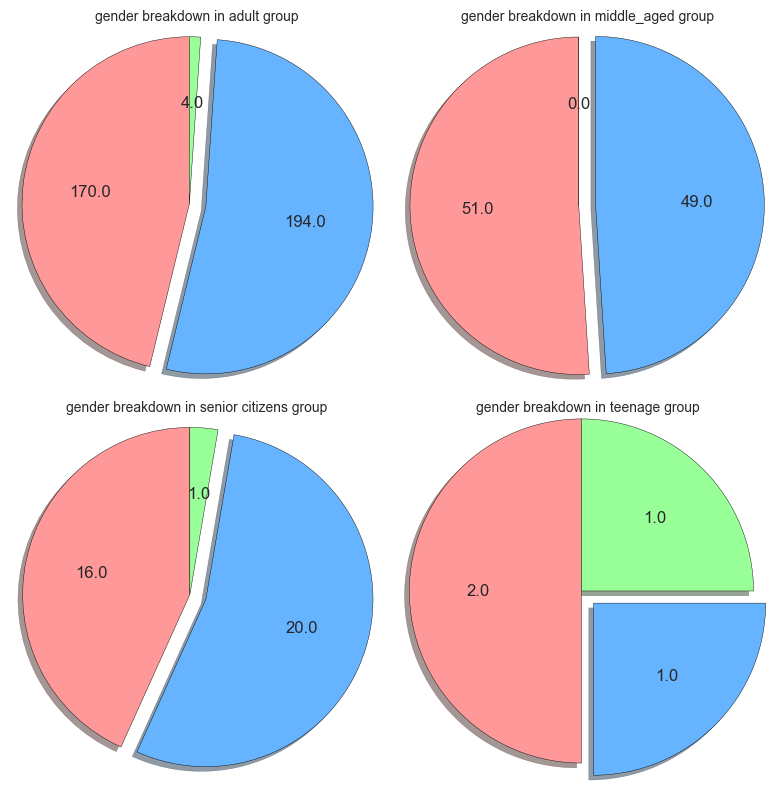

In [14]:
fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
fig.canvas.set_window_title('Pie Charts desribing gender breakdown within Age_Categories')
explode = [0,0.1,0]
colors = ['#ff9999','#66b3ff','#99ff99']


def absolute_value(val):
    a=np.round(val/100.*size.sum(),1)
    return a
# Ist pie chart describing adults 
labels=Df_gender_xtab.index
size=Df_gender_xtab['adult'].values
ax1.pie(size, explode=explode, colors=colors, autopct=absolute_value, shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('gender breakdown in adult group', fontsize='10')

# IInd pie chart describing middle_aged
labels=Df_gender_xtab.index
size=Df_gender_xtab['middle_aged'].values
ax2.pie(size, explode=explode, colors=colors, autopct=absolute_value, shadow=True, startangle=90)
ax2.axis('equal')
ax2.set_title('gender breakdown in middle_aged group', fontsize='10')


# IIIrd pie chart describing senior_citizen
labels=Df_gender_xtab.index
size=Df_gender_xtab['senior_citized'].values
ax3.pie(size,explode=explode, colors=colors, autopct=absolute_value, shadow=True, startangle=90)
ax3.axis('equal')
ax3.set_title('gender breakdown in senior citizens group', fontsize='10')

# IVth pie chart describing teenage
labels=Df_gender_xtab.index
size=Df_gender_xtab['teenage'].values
ax4.pie(size,explode=explode, colors=colors, autopct=absolute_value, shadow=True, startangle=90)
ax4.axis('equal')
ax4.set_title('gender breakdown in teenage group', fontsize='10')


plt.tight_layout()
plt.show()

In [15]:
print(Df['AMOUNT OF LIGHT PHYSICAL ACTIVITY PER WEEK'].value_counts())
print(Df['AMOUNT OF MODERATE PHYSICAL ACTIVITY PER WEEK'].value_counts())
print(Df['ACCESS TO CAR'].value_counts())

Daily           187
1 - 3 times     158
3 - 5 times     146
Almost never     20
Name: AMOUNT OF LIGHT PHYSICAL ACTIVITY PER WEEK, dtype: int64
1 - 3 times     209
3 - 5 times     129
Almost never    109
Daily            62
Name: AMOUNT OF MODERATE PHYSICAL ACTIVITY PER WEEK, dtype: int64
Yes    359
No     147
Name: ACCESS TO CAR, dtype: int64


In [16]:
print(Df.columns)

Index(['AGE', 'GENDER', 'MUNICIPALITY', 'WORK STATUS', 'ACCESS TO CAR',
       'AMOUNT OF LIGHT PHYSICAL ACTIVITY PER WEEK',
       'AMOUNT OF MODERATE PHYSICAL ACTIVITY PER WEEK',
       '# OF BIKE OWNERS IN YOUR HOUSE', 'BICYCLE STOLEN?', 'CYCLING HABITS',
       'HIT BY A CAR?', 'ACTIVITIES YOU USE BICYCLE FOR - commuting',
       'ACTIVITIES YOU USE BICYCLE FOR - Short trips',
       'ACTIVITIES YOU USE BICYCLE FOR - Recreation',
       'ACTIVITIES YOU USE BICYCLE FOR - Racing',
       'ACTIVITIES YOU USE BICYCLE FOR - I don’t ride',
       'CYCLING COURSES MOST DESIRED - cycling skills',
       'CYCLING COURSES MOST DESIRED  — basic repair',
       'CYCLING COURSES MOST DESIRED - women',
       'CYCLING COURSES MOST DESIRED - rural skills',
       'CYCLING COURSES MOST DESIRED  - adult refresher',
       'CYCLING COURSES MOST DESIRED - adult beginner',
       'CYCLING COURSES MOST DESIRED - children',
       'POSITIVE CHANGES IN W-E TO ENCOURAGE CYCLING',
       'WOULD YOU USE A B

In [17]:
Df.rename(columns={'ACCESS TO CAR':'CAR', 
                   'AMOUNT OF LIGHT PHYSICAL ACTIVITY PER WEEK':'LIGHT_ACTIVITY',
                    'AMOUNT OF MODERATE PHYSICAL ACTIVITY PER WEEK':'MODERATE_ACTIVITY',
                     'POSITIVE CHANGES IN W-E TO ENCOURAGE CYCLING':'POSITIVE_CHANGES',
                    'WOULD YOU USE A BIKE SHARE?':'BIKE_SHARE',
                    'HAVE YOU HEARD OF BIKE WE?':'AWARE_BIKE_WE','HIT BY A CAR?':'HIT', 
                    '# OF BIKE OWNERS IN YOUR HOUSE':'TOTAL_BIKE','BICYCLE STOLEN?':'BIKE_STOLEN'}, inplace=True)


c:\python34\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [18]:
Df.columns

Index(['AGE', 'GENDER', 'MUNICIPALITY', 'WORK STATUS', 'CAR', 'LIGHT_ACTIVITY',
       'MODERATE_ACTIVITY', 'TOTAL_BIKE', 'BIKE_STOLEN', 'CYCLING HABITS',
       'HIT', 'ACTIVITIES YOU USE BICYCLE FOR - commuting',
       'ACTIVITIES YOU USE BICYCLE FOR - Short trips',
       'ACTIVITIES YOU USE BICYCLE FOR - Recreation',
       'ACTIVITIES YOU USE BICYCLE FOR - Racing',
       'ACTIVITIES YOU USE BICYCLE FOR - I don’t ride',
       'CYCLING COURSES MOST DESIRED - cycling skills',
       'CYCLING COURSES MOST DESIRED  — basic repair',
       'CYCLING COURSES MOST DESIRED - women',
       'CYCLING COURSES MOST DESIRED - rural skills',
       'CYCLING COURSES MOST DESIRED  - adult refresher',
       'CYCLING COURSES MOST DESIRED - adult beginner',
       'CYCLING COURSES MOST DESIRED - children', 'POSITIVE_CHANGES',
       'BIKE_SHARE', 'AWARE_BIKE_WE',
       'Are you aware that cyclists riding a bicycle without a bell and rear and front lights are subject to a $110 fine under the Highw

In [19]:
print(Df['POSITIVE_CHANGES'].isnull().sum())
print(Df['BIKE_SHARE'].isnull().sum())
print(Df['AWARE_BIKE_WE'].isnull().sum())

177
22
16


In [20]:
print(Df['BIKE_SHARE'].value_counts())
print(Df['AWARE_BIKE_WE'].value_counts())


No                                         195
Yes                                        165
Yes for friends or family when visiting    129
Name: BIKE_SHARE, dtype: int64
No     304
Yes    191
Name: AWARE_BIKE_WE, dtype: int64


(380, 30)


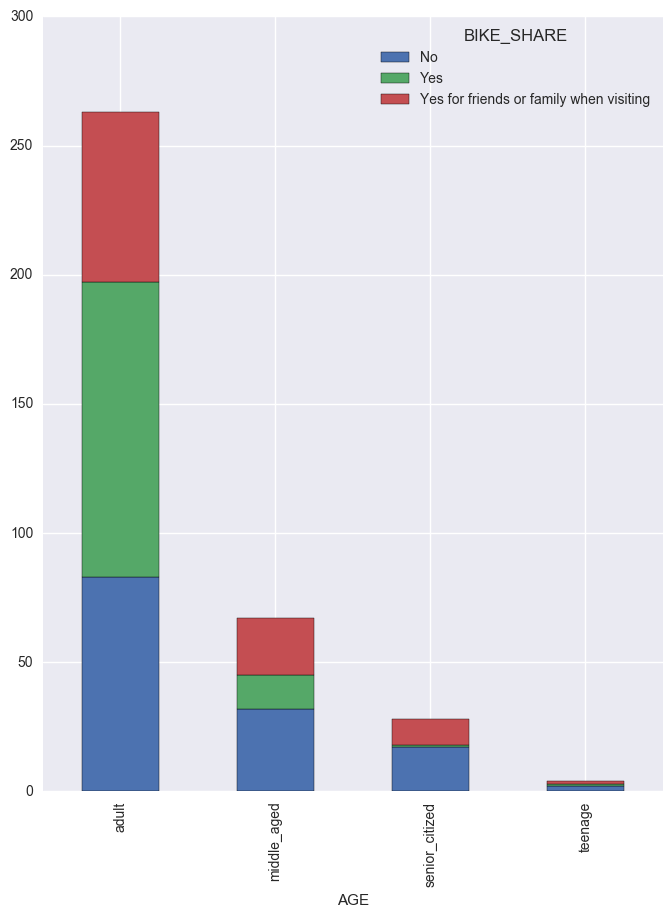

In [23]:
df_windsor = Df[Df['MUNICIPALITY']=='Windsor']
print(df_windsor.shape)
df_win_bike_share = pd.crosstab(df_windsor.AGE, df_windsor.BIKE_SHARE)
df_win_bikewe = pd.crosstab(df_windsor.AGE, df_windsor.AWARE_BIKE_WE)
plt.figure(1)
df_win_bike_share.plot.bar(stacked=True, figsize=(8,10))
plt.show()

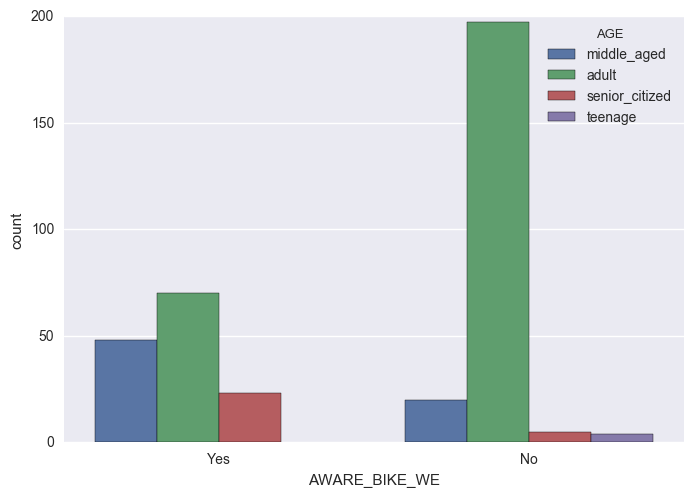

In [25]:
sns.countplot(x='AWARE_BIKE_WE',hue='AGE', data=df_windsor)
plt.show()

(242, 30)
(242,)
(242,)
15
      words  frequency
0      bike         84
1       the         70
2       and         69
3     lanes         55
4        to         45
5        of         41
6      more         33
7        in         29
8        on         27
9      More         25
10        I         25
11      The         24
12        a         24
13     Bike         21
14  cycling         17
15       is         15
16   trails         15
17     some         15
18      for         14
19   people         13


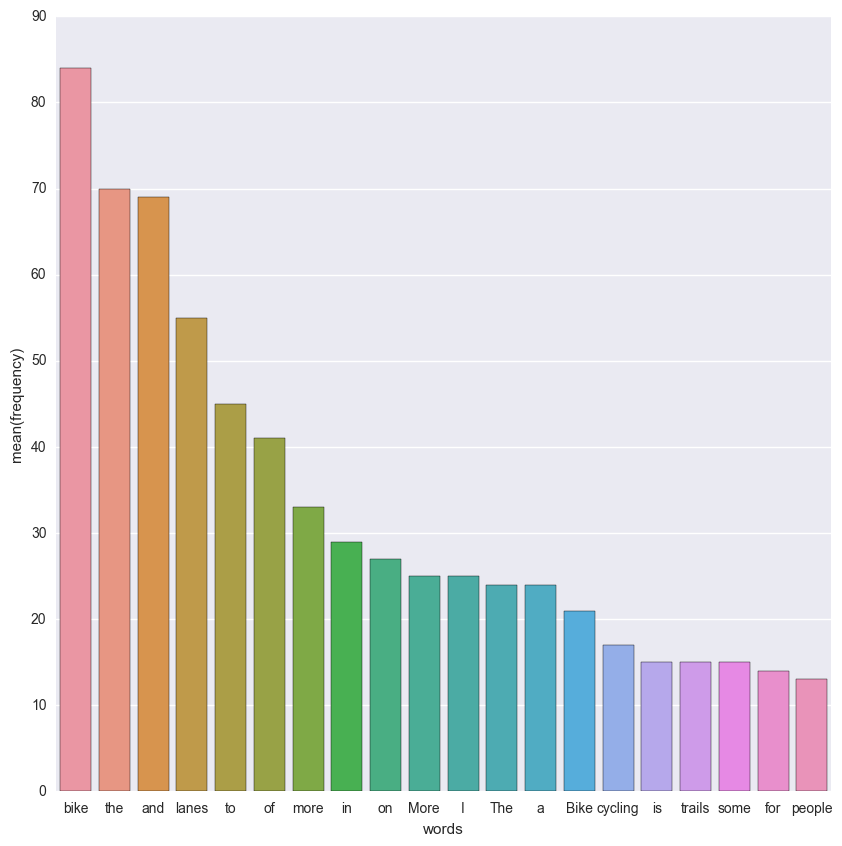

In [26]:

df_windsorna = df_windsor.dropna(subset=['POSITIVE_CHANGES', 'CYCLING HABITS','TOTAL_BIKE','BIKE_STOLEN'])
print(df_windsorna.shape)
docs = df_windsorna['POSITIVE_CHANGES']
print(docs.shape)
def tokenizer(text):
    return text.split()
from nltk import FreqDist
word_list =docs.apply(tokenizer)
print(word_list.shape)
print(len(word_list[0]))
word_count = word_list.apply(FreqDist).sum()
common_word = pd.DataFrame(word_count.most_common(20), columns=['words', 'frequency'])
print(common_word)
plt.figure(figsize=(10,10))
sns.barplot(x='words', y='frequency', data=common_word)
plt.show()

In [30]:
import re
def preprocessor(tex):
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', tex)
    tex = re.sub('[\W]+', ' ', tex.lower()) + ''.join(emoticons).replace('-', '')
    return tex
opinion = docs.apply(preprocessor)
print(opinion[0])

trails on the herb gray too bad doesn t connect to riverfront trail or cabana road


,AGE,GENDER,MUNICIPALITY,WORK STATUS,CAR,LIGHT_ACTIVITY,MODERATE_ACTIVITY,TOTAL_BIKE,BIKE_STOLEN,CYCLING HABITS,...,CYCLING COURSES MOST DESIRED - adult refresher,CYCLING COURSES MOST DESIRED - adult beginner,CYCLING COURSES MOST DESIRED - children,POSITIVE_CHANGES,BIKE_SHARE,AWARE_BIKE_WE,Are you aware that cyclists riding a bicycle without a bell and rear and front lights are subject to a $110 fine under the Highway Traffic Act?,Are you aware that all drivers in Ontario must maintain at least one metre of space between their vehicle and a cyclist wherever possible?,Are you aware that it is illegal and unsafe for cyclists (other than children) to ride on sidewalks?,"Are you aware that cyclists riding on the road must travel in the same direction as car traffic, and one metre from the curb unless they are turning left?"
0,middle_aged,Female,Windsor,Employed,Yes,Daily,1 - 3 times,Three or more,More than Once,I ride almost every day in nice weather,...,NaN,NaN,NaN,"Trails on the Herb Gray, too bad doesn't conne...",No,Yes,NaN,NaN,NaN,NaN
1,adult,Male,Windsor,Employed;University Student,Yes,Daily,Daily,One,Once,I ride almost every day all year long,...,NaN,NaN,NaN,"Unbiased street design (e.g., Bike markings on...",Yes,Yes,Yes,Yes,Yes,Yes
2,middle_aged,Male,Windsor,Employed,Yes,Daily,Daily,Three or more,Once,I ride almost every day in nice weather,...,NaN,NaN,NaN,Cwats - create a plan and havr it implemented ...,Yes,Yes,Yes,Yes,Yes,Yes
3,senior_citized,Male,Windsor,Self Employed,Yes,Daily,1 - 3 times,Two,Never,I ride almost every day all year long,...,NaN,NaN,NaN,Bike Friendly Windsor Essex relentless and pos...,Yes,Yes,Yes,Yes,Yes,Yes
4,senior_citized,Female,Windsor,Unemployed,Yes,Daily,3 - 5 times,One,Never,I ride almost every day in nice weather,...,NaN,NaN,NaN,"some bike lanes are available, CWATS is adding...",No,Yes,Yes,Yes,Yes,Yes
7,adult,Male,Windsor,NaN,Yes,1 - 3 times,1 - 3 times,One,Never,I ride occasionally in nice weather,...,NaN,NaN,NaN,Widening of roads,No,Yes,Yes,Yes,Yes,Yes
8,senior_citized,Female,Windsor,retired,Yes,Daily,Daily,One,Never,I don't ride a bicycle,...,NaN,NaN,NaN,We have seen an increase in bicycle lanes and ...,Yes for friends or family when visiting,Yes,Yes,Yes,Yes,Yes
9,senior_citized,Male,Windsor,NaN,Yes,Daily,1 - 3 times,Two,Never,I ride almost every day in nice weather,...,NaN,NaN,NaN,Only the trails on the Herb Gray Parkway that ...,Yes for friends or family when visiting,Yes,No,Yes,Yes,Yes
10,adult,Male,Windsor,Employed,Yes,Daily,3 - 5 times,3 or more,More than once,I ride almost every day all year long,...,NaN,NaN,NaN,More lanes have been installed including in my...,Yes for friends or family when visiting,Yes,Yes,Yes,Yes,Yes
12,adult,Female,Windsor,Employed,No,3 - 5 times,Almost never,1,Never,I ride occasionally in nice weather,...,Adult refresher course,NaN,NaN,Bike registry,No,Yes,Yes,Yes,Yes,Yes


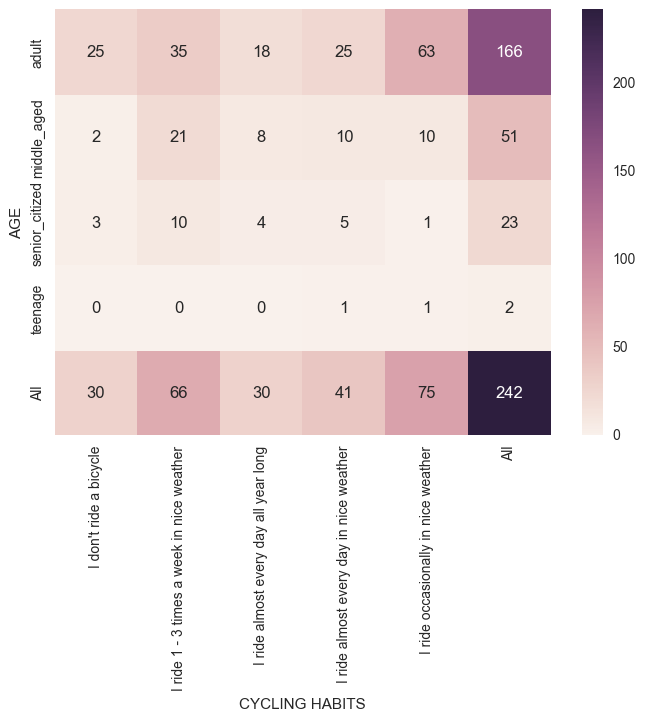

In [32]:
docs_habit = df_windsorna.loc[:,['CYCLING HABITS']]
df_habit = pd.crosstab([df_windsorna['AGE']], df_windsorna['CYCLING HABITS'], margins=True)
sns.heatmap(df_habit, annot=True, fmt="d")
plt.show()

In [34]:
df_habit

CYCLING HABITS,I don't ride a bicycle,I ride 1 - 3 times a week in nice weather,I ride almost every day all year long,I ride almost every day in nice weather,I ride occasionally in nice weather,All
AGE,,,,,,
adult,25,35,18,25,63,166
middle_aged,2,21,8,10,10,51
senior_citized,3,10,4,5,1,23
teenage,0,0,0,1,1,2
All,30,66,30,41,75,242


In [35]:
df_windsorna['TOTAL_BIKE'] = df_windsorna.loc[:,['TOTAL_BIKE']].replace(to_replace=['One','Two','Three or more'], value=['1','2','3 or more'])

c:\python34\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


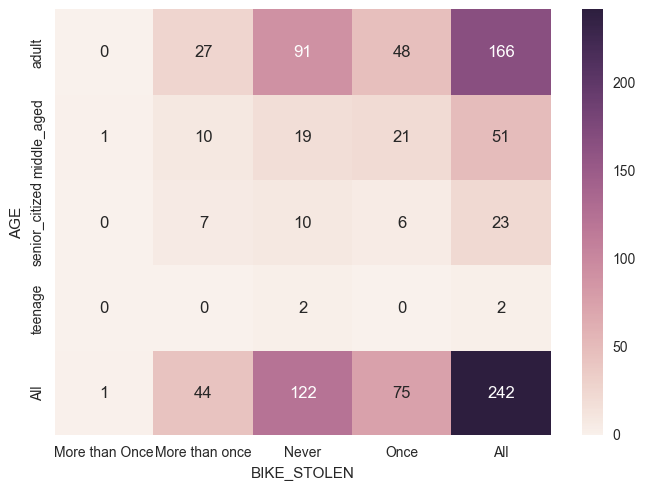

In [36]:
docs_stolen =pd.crosstab([df_windsorna['AGE']], df_windsorna['BIKE_STOLEN'], margins=True)
sns.heatmap(docs_stolen, annot=True, fmt="d")
plt.show()